<div style="text-align: center"> <h1>Ridge & Lasso Regression(Regularized Regression)</h1></div>

# Understand Regularized Regression
> ### Regularized regression is a regression method with an additional constraint designed to deal with a large number of independent variables (a.k.a. predictors). It does so by imposing a larger penalty on unimportant ones, thus shrinking their coefficients towards zero.

### The objective of regularization is to end up with a model:

> That is simple and interpretable.

> That generalizes well beyond the sample of our study.

> Whose coefficients won’t change much if we replicate the study.

# **How regularized regression works**
#### Regularized regression works exactly like ordinary (linear or logistic) regression but with an additional constraint whose objective is to shrink unimportant regression coefficients towards zero.

#### And because these coefficients can either be positive or negative, minimizing the sum of the raw coefficients will not work. Instead, we can use 1 of the following constraints:

#### Either to minimize the sum of the absolute value of the regression coefficients — we call this method L1 regularization (a.k.a. LASSO regression) Or to minimize the sum of the squares of the coefficients — we call this method L2 regularization (a.k.a. Ridge regression) And because of this tiny difference, these 2 methods will end up behaving very differently.

# Difference between L1 and L2 regularization

#### The biggest difference between L1 and L2 regularization is that L1 will shrink some coefficients to exactly zero (practically excluding them from the model), making it behave as a variable selection method.

#### In contrast, because L2 minimizes the sum of the squares of the coefficients, it will affect larger ones much more than it will shrink smaller ones, so coefficients close to zero will barely be shrunk further. Therefore, with L2 regularization, we end up with a model that has a lot of coefficients close to, but not exactly zero.

# So is L1 better than L2 regularization?

#### Not necessarily.

> #### LASSO (L1 regularization) is better when we want to select variables from a larger subset, for instance for exploratory analysis or when we want a simple interpretable model. It will also perform better (have a higher prediction accuracy) than ridge regression in situations where a small number of independent variables are good predictors of the outcome and the rest are not that important.

> #### Ridge regression (L2 regularization) performs better than LASSO when we have a large number of variables (or even all of them) each contributing a little bit in predicting the outcome.

### So how would we know in what situation we are?

> #### Well it certainly depends on the problem at hand. This should be determined case by case using expert knowledge and an extensive literature review.

> ## How much shrinkage should we apply?

#### As we discussed above, regularized regression shrinks coefficients by applying a certain penalty. We can control how big this penalty is by using different values of a parameter called lambda: λ.

#### The larger the value of λ , the bigger the penalty, and the smaller the regression coefficients will be.

#### λ can range from zero (no penalty) to infinity (where the penalty is large enough that the algorithm is forced to shrink all coefficients to zero).

#### Note that we cannot use the same dataset to both select the best λ and test the final model (built using the best λ). This is considered data dredging as we will be using the same data to come up with a hypothesis and to test it.

#### One way to get around this problem is to use k-fold cross-validation to decide on which λ to use.

## How cross-validation can help in selecting the best λ?

#### A k-fold cross-validation divides the sample into k groups. It runs k times, each time using 1 of the groups as validation set and the other (k − 1) groups as training sets.

#### The training sets are used to build the models with different lambdas and the validation sets are used to check the accuracy of these models.

#### Once the best λ is selected, we rerun the regularized model using the best λ on all of the sample data and report its results.

> Note: Don’t forget to standardize your variables, because regularization is trying to shrink coefficients, it will affect larger coefficients more than smaller ones. So the scale on which each variable is measured will play a very important role on how much the coefficient will be shrunk. Standardizing helps deal with this problem by setting all variables on the same scale.

# Implementation of Lasso and Ridge Regression using a USA Housing Dataset and comparing it with Linear Regression

In [16]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Machine Learning and Metrics Libraries

from sklearn.linear_model import Lasso, Ridge , LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
# load the Boston housing dataset
wine_red = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\ML-MF Pesentation\winequality-red.csv", sep=";"
)
wine_white = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\ML-MF Pesentation\winequality-white.csv",sep=";")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [18]:
wine_red.drop('quality',axis=1,inplace=True)
wine_white.drop('quality',axis=1,inplace=True)

In [19]:
df = pd.concat([wine_red,wine_white],axis=0)

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400


In [21]:
# Checking Duplicate Values and Removing them

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800
5,7.400,0.660,0.000,1.800,0.075,13.000,40.000,0.998,3.510,0.560,9.400


In [23]:
# Removing Outliers from the dataset

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    from scipy import stats
    z = np.abs(stats.zscore(df))
    df = df[(z < 3).all(axis=1)]
    return df

for i in df.columns:
    df = remove_outliers(df, i)

In [25]:
X = df.drop("alcohol", axis=1)
y = df[["alcohol"]]

In [26]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Creating Grid Search for Lasso Regression

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

# Create a based model

lasso = Lasso()

# Instantiate the grid search model

grid_search_lasso = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

# Fit the grid search to the data

grid_search_lasso.fit(X_train, y_train)


# print the best parameters

print(grid_search_lasso.best_params_)
print(
    "R2 Score on Training Set: ", r2_score(y_train, grid_search_lasso.predict(X_train))
)
print(grid_search_lasso.best_estimator_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.001}
R2 Score on Training Set:  0.4105791257497674
Lasso(alpha=0.001)


L1 Regression RMSE:  0.8932660106566545
L1 Regression R2 score 0.4152984036090128


<Axes: xlabel='alcohol'>

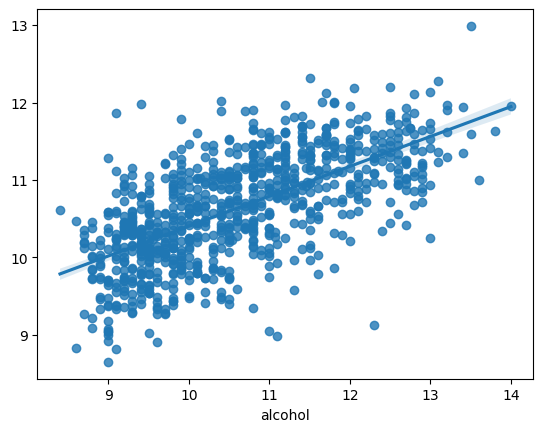

In [32]:
# apply L1 regression
lasso = Lasso(**grid_search_lasso.best_params_)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions) ** 0.5
print("L1 Regression RMSE: ", lasso_mse)
print("L1 Regression R2 score", r2_score(y_test, lasso_predictions))
sns.regplot(x=y_test, y=lasso_predictions, fit_reg=True)

In [33]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based for ridge regression

param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a based model

ridge = Ridge()

# Instantiate the grid search model

grid_search_ridge = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)

# Fit the grid search to the data

grid_search_ridge.fit(X_train, y_train)

# print the best parameters

print(grid_search_ridge.best_params_)
print(
    "R2 Score on Training Set: ", r2_score(y_train, grid_search_ridge.predict(X_train))
)
print(grid_search_ridge.best_estimator_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'alpha': 0.001}
R2 Score on Training Set:  0.8417699431724596
Ridge(alpha=0.001)


L2 Regression RMSE:  0.49029468858602077
L2 Regression R2 score 0.8238482190613117


<Axes: xlabel='alcohol'>

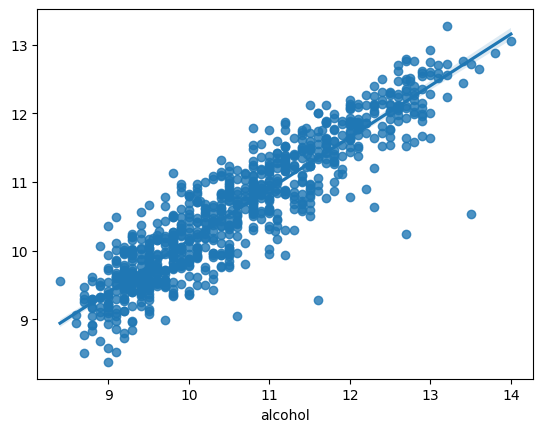

In [34]:
# apply L2 regression
ridge = Ridge(**grid_search_ridge.best_params_)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions) ** 0.5
print("L2 Regression RMSE: ", ridge_mse)
print("L2 Regression R2 score", r2_score(y_test, ridge_predictions))
sns.regplot(x=y_test, y=ridge_predictions, fit_reg=True)

Linear Regression RMSE:  0.49029468858602077
Linear Regression R2 score 0.8238482190613117


<Axes: xlabel='alcohol'>

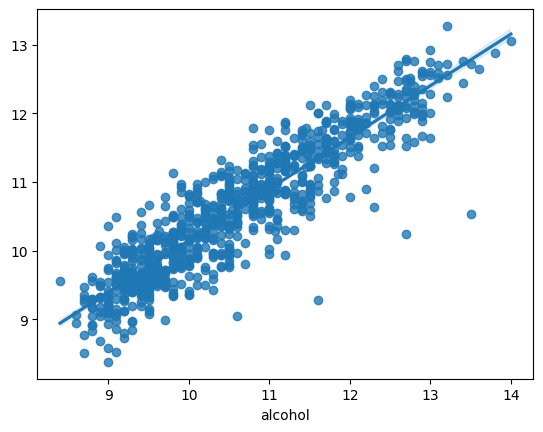

In [35]:
# apply L2 regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = ridge.predict(X_test)
lr_mse = mean_squared_error(y_test, ridge_predictions) ** 0.5
print("Linear Regression RMSE: ", lr_mse)
print("Linear Regression R2 score", r2_score(y_test, lr_predictions))
sns.regplot(x=y_test, y=lr_predictions, fit_reg=True)

> # Advantages and limitations of regularized regression


# Advantages of regularization

### 1. L1 regularization produces a simple interpretable model

#### As discussed above, LASSO regression can be considered a variable selection method. It takes as input a large number of independent variables and outputs a simple, more interpretable model that only contains the most important predictors of the outcome.

> Note that L2 regularization (ridge regression) does not share such advantage as it outputs a model that contains all the independent variables with much of their coefficients close to but not equal to zero. Therefore, ridge regression is not very useful for interpreting the relationship between the predictors and the outcome.

### 2. The regularized model generalizes better

#### The core idea of regularization is to minimize the effect of unimportant predictors by shrinking their coefficients. This improves the fit of the model by not fitting the noise in our sample which means that it will generalize better than a simple linear or logistic regression.

### 3. L1 regularization is computationally faster than other variable selection methods

#### Particularly, it is computationally faster than stepwise and best subset selection as these 2 will have to run several regression models and LASSO has to run 1 model only. This will certainly be an advantage if the number of predictors to choose from, or the sample size, are very large.

### 4. Regularization still works when the number of predictors exceeds the number of observations

#### Unlike other variable selection methods, regularized regression still works when number of independent variables exceeds the number of observations (for regularized linear regression), or the number of events (for regularized logistic regression).

> Another example of a method that still works with high dimensional data is forward stepwise selection.


## Limitations of regularization

### 1. A larger dataset with a simple model is better than a small dataset with a complex model

#### Collecting more data is almost always the answer when we want more accurate and more generalizable models. So regularization does not replace the need for larger sample sizes when we need them.

### 2. Variable selection using L1 regularization does not replace expert knowledge

#### Selecting variables according to expert knowledge (based on theory and past studies) is better than using LASSO or other automated methods of selection. Remember that important variables judged based on expert knowledge should still be included in the model even if they are not statistically related to the outcome — an option not available when running regularized regression.

## 3. No p-values for the regression coefficients

#### The coefficients of a regularized regression don’t seem to have standard errors and p-values that can be interpreted as easily as in ordinary linear or logistic regression.

> ### Here’s a bad idea to work around this problem:

#### The idea is to use LASSO to select important variables and then use these variables as inputs in another linear/logistic regression model and interpret the outputted coefficients and p-values of that model.

#### This reasoning is flawed for the same reason you should not use a hypothesis test on each candidate variable and then only include those who have p-value < 0.2, for example, in the final model. In both of these examples, the problem is multiple testing (which the p-values of the final model do not account for). So you end up reading inflated results and having variables that are not related to each other in reality showing up as statistically significant.

### References:
    
James G, Witten D, Hastie T, Tibshirani R. An Introduction to Statistical Learning: With Applications in R. 1st ed. 2013, Corr. 7th printing 2017 edition. Springer; 2013.

Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd Edition. Springer; 2016.

Jr FEH. Regression Modeling Strategies: With Applications to Linear Models, Logistic and Ordinal Regression, and Survival Analysis. 2nd ed. 2015 Edition. Springer; 2015.

Steyerberg EW. Clinical Prediction Models: A Practical Approach to Development, Validation, and Updating. 2009th Edition. Springer; 2008.